## The Spark Foundation Internship Task - 3
### Problem Statement: Perform  Exploratory Data Analysis on 'SampleSuperStore'
#### As a buisness manager, try to find out the weak areas where you can work to make more profit.

In [1]:
# Importing all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading the data
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
# Reading data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Check for rows and columns
df.shape

(9994, 13)

##### There are total 9994 rows and 13 columns in dataset

In [5]:
# check for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##### There is no missing values in dataset

In [6]:
# summarizing data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# check for datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# check for duplicates values in dataset
df.duplicated().sum()

17

##### In our dataset 17 duplicates records are there.

In [9]:
# df = df.drop_duplicates().reset_index().drop(['index','level_0'],axis = 1)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### EDA

In [10]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


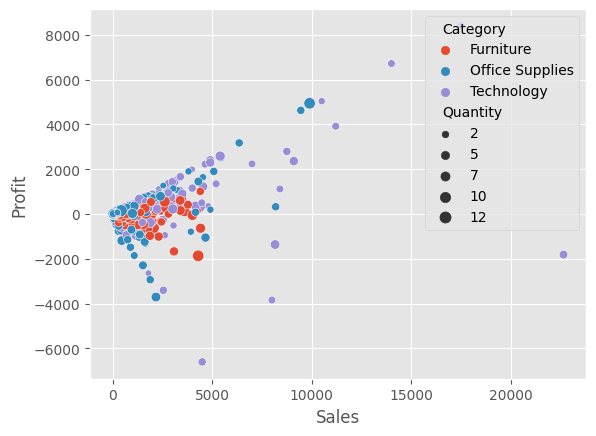

In [11]:
# plotting scatter plot of sales and Profit
sns.scatterplot(data=df,x='Sales',y='Profit',color='orange',hue='Category',size='Quantity')
plt.show()

#### As the sales increses profit is also increasing.

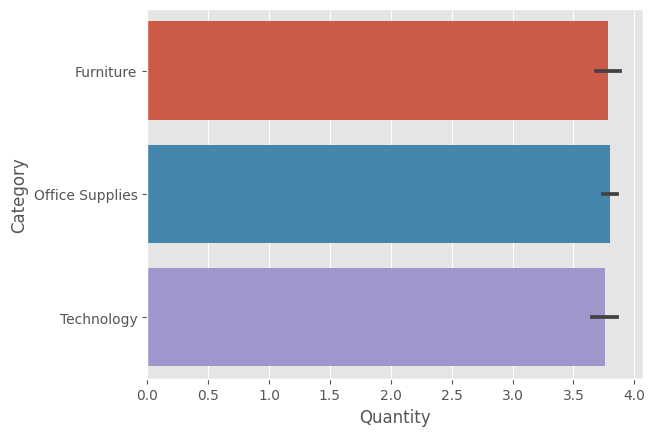

In [12]:
# plotting bar plot
sns.barplot(data=df,x='Quantity',y='Category')
plt.show()

#### Less number of quantity where sold in technology

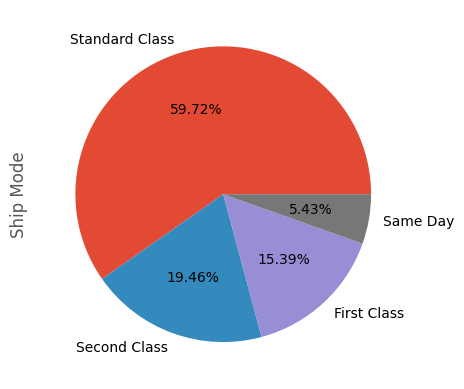

In [13]:
ship_mode = df['Ship Mode'].value_counts()
ship_mode.plot(kind='pie',autopct='%0.2f%%')
plt.show()

#### Most of Customer Preferred standard class ship mode

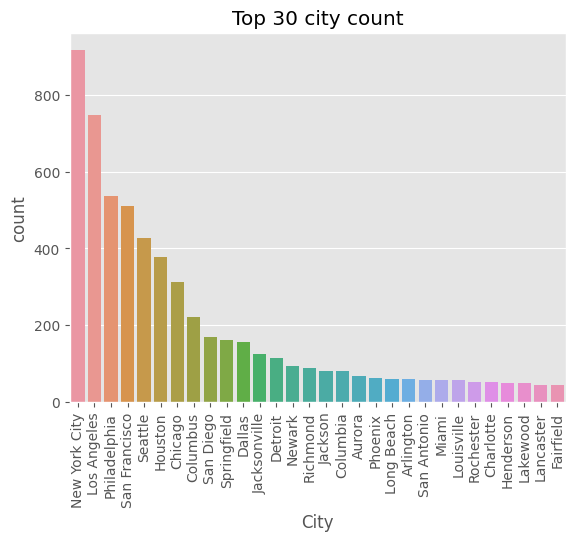

In [14]:
sns.countplot(data=df,x='City',order=df['City'].value_counts().iloc[:30].index)
plt.title('Top 30 city count')
plt.xticks(rotation=90)
plt.show()

#### Newyork city has highest value counts

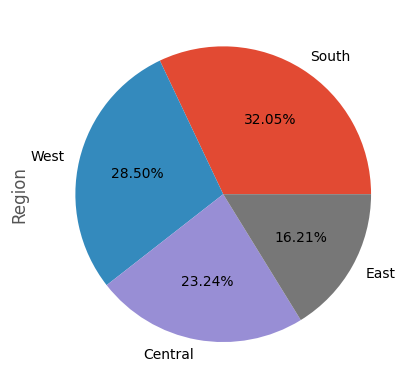

In [15]:
state = df['Region'].value_counts()
labels = df['Region'].unique().tolist()
state.plot(kind='pie',autopct='%0.2f%%',labels=labels)
plt.show()

#### We must focus on east and central region in order improve sales

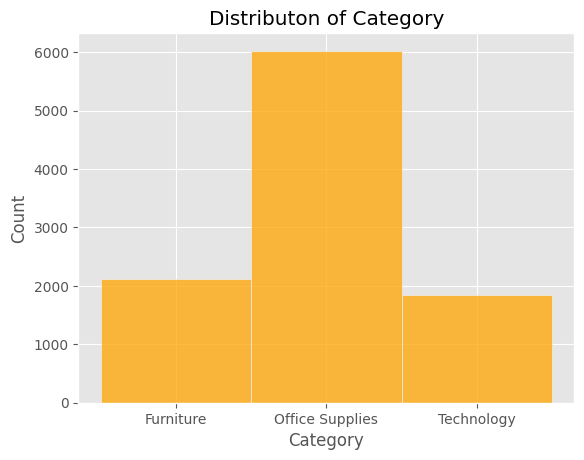

In [16]:
plt.title('Distributon of Category')
sns.histplot(data=df,x='Category',color='orange')
plt.show()

#### Most of customer preffered office supplies category

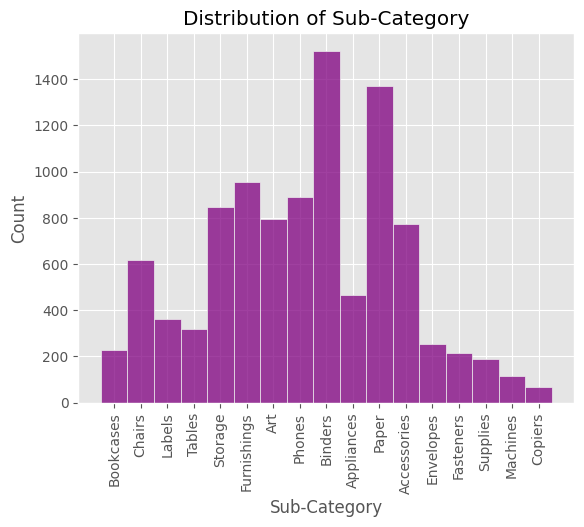

In [17]:
plt.title('Distribution of Sub-Category')
sns.histplot(data=df,x='Sub-Category',color='purple')
plt.xticks(rotation=90)
plt.show()

#### We need to focus on sub categories like copiers, machines, supplies, Fasteners, Envelopes in order increase sales

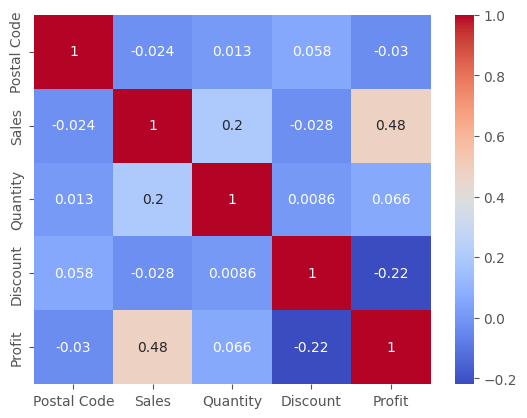

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

#### Quantity and sales have positive correlation with profit

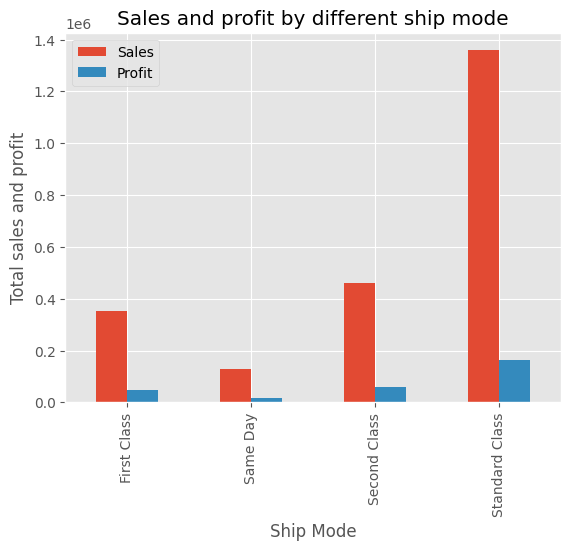

In [19]:
df_ship = df.groupby('Ship Mode')['Sales','Profit'].agg(sum)
df_ship.plot(kind='bar')
plt.title('Sales and profit by different ship mode')
plt.ylabel('Total sales and profit')
plt.show()

#### We must focus on same day ship mode in order to increase profit

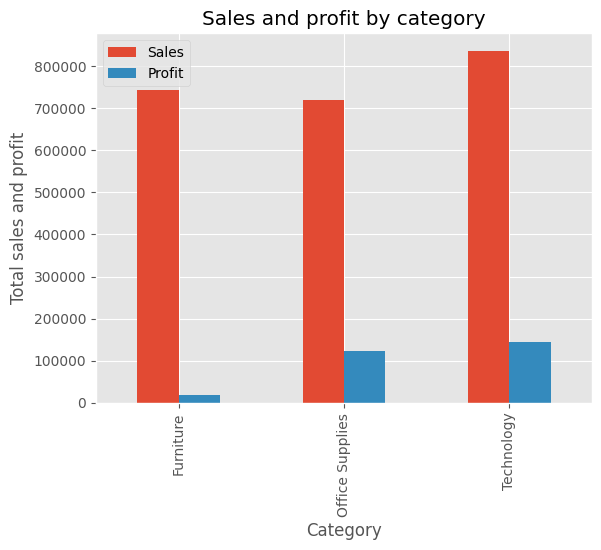

In [20]:
df_ship = df.groupby('Category')['Sales','Profit'].agg(sum)
df_ship.plot(kind='bar')
plt.title('Sales and profit by category')
plt.ylabel('Total sales and profit')
plt.show()

#### We must focus on furniture categories in order to increase sales.

<h1 style='color:orange;border:2px solid orange;padding:5px;border-radius:10px;text-align:center;background:black;'>
    Conclusion
</h1>

<div style="color:blue;border:2px solid orange;border-radius:10px;background:black">
    
* Standard Class shipmode is preferred by most of the customers also it makes more sales and profit.

* Less number of quantity where sold in technology.
    
* Most of Customer Preferred standard class ship mode.
    
* We must focus on east and central region in order to improve sales
    
* Most of customer preffered office supplies category.
    
* We need to focus on sub categories like copiers, machines, supplies, Fasteners, Envelopes in order increase sales.
    
* Quantity and sales have positive correlation with profit.
    
* We must focus on same day ship mode in order to increase profit.|
</div>